<a href="https://colab.research.google.com/github/18K41A0432preethi/NNDL1/blob/main/assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_excel("/content/Load_Data_in_kW.xlsx",header=None)
df.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [5]:
z=np.abs(stats.zscore(df))
print(z)

[[0.04910416]
 [0.08229029]
 [0.08782131]
 ...
 [0.09743692]
 [0.07253822]
 [0.03181432]]


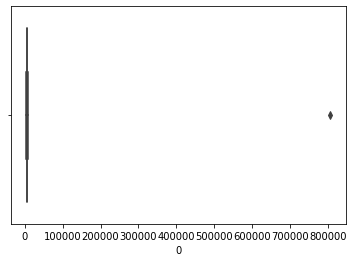

In [6]:
sns.boxplot(x=df[0])

In [7]:
data = df
q = data[0].quantile(0.99)
data[data[0] < q]
q_low = data[0].quantile(0.01)
q_high  = data[0].quantile(0.99)

df_filtered = data[(data[0] < q_high) & (data[0] > q_low)]
df_filtered.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [8]:
print(len(data))
print(len(df_filtered))
if(len(df)==len(df_filtered)):
  print('No outliers')

2184
2140


In [9]:
df = df_filtered
data_n = df.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,0
0,0.372950
1,0.254941
2,0.235273
3,0.273574
4,0.299162


In [10]:
train_data,test_data=train_test_split(data_n,test_size=0.1)

In [11]:
print(len(train_data))
train_data.head()

1926


,0
816,0.449034
448,0.532365
665,0.892149
264,0.405169
993,0.514864


In [12]:
x=[]
y=[]
for i in range(len(train_data.iloc[:,0])-24):
  x.append(train_data.iloc[i,0])
  y.append(train_data.iloc[i+24,0])

In [13]:
#Initialise values
m=1
c=-1
max_iters=100  # Maximum Iterations
eta=0.1      # learning rate
ns=len(x)
gama=0.9
vm=0
vc=0
err=[]
for i in range(0,max_iters):
  error=0
  for j in range(0,ns):
    error+=((y[j]-(m*x[j])-c))**2
    gm=((-1.0)*(y[j]-m*x[j]-c)*(x[j]))
    gc=((-1.0)*(y[j]-m*x[j]-c))
    #find change in m , c
    vm=(gama*vm)-(eta*gm)
    vc=(gama*vc)-(eta*gc)
    #update variable 
    m = m + vm
    c = c + vc
    error=(1/(2*len(x)))*(error)
    err.append(error)
#print variable m, c
print("The minimum value obtained at m =%.2f"%(m),", c = %.2f"%(c))

The minimum value obtained at m =-0.21 , c = 0.58


In [14]:
train_data_pred = [i for i in x]
for k in range(len(x)):
    train_data_pred[k]=(m*x[k] + c)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,train_data_pred)
print("Mean Square Error(MSE) of training data : ",mse)
print("Root Mean Square Error(RMSE) training data:",mse**0.5)

Mean Square Error(MSE) of training data :  0.0453990135883517
Root Mean Square Error(RMSE) training data: 0.21307044278442683


Text(0.5, 1.0, 'Predicted data vs Actual data')

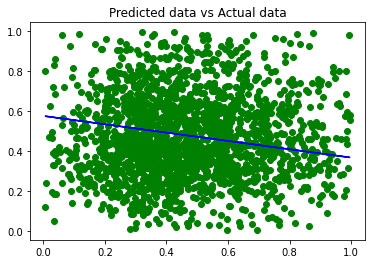

In [16]:
plt.plot(np.array(x),np.array(train_data_pred),'blue')
plt.scatter(np.array(x),np.array(y),color='green')
plt.title("Predicted data vs Actual data")

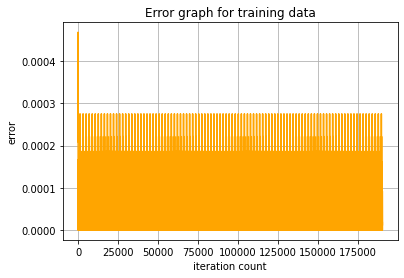

In [18]:
iters = np.arange(max_iters*len(x))
plt.plot(iters,err,'orange')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

In [19]:
x1 = []
y1 = []
for i in range(len(test_data.iloc[:,0])-24):
    x1.append(test_data.iloc[i,0])
    y1.append(test_data.iloc[i+24,0])
test_data_pred = [i for i in x1]
for k in range(len(x1)):
    test_data_pred[k]=(m*x1[k] + c)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1,test_data_pred)
print("Mean Square Error(MSE) of testing data : ",mse)
print("Root Mean Square Error(RMSE) testing data:",mse**0.5)

Mean Square Error(MSE) of testing data :  0.05671756051672881
Root Mean Square Error(RMSE) testing data: 0.23815448876040277


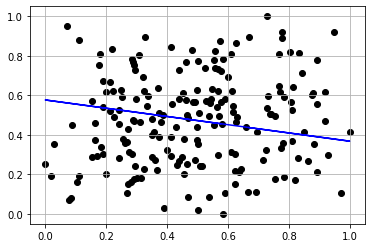

In [21]:
plt.scatter(x1,y1,color='black')
plt.plot(x1,test_data_pred,'blue')
plt.grid()

In [22]:
x_max = y_max= 8841.669480
x_min = y_min = 3377.919600
x2 =x3 = float(input("enter load of previous hour :"))
x2 = (x2 - x_min)/(x_max - x_min)
y2 = m*x2 + c
y2 = y2*(y_max - y_min) + y_min
print("Load at hour based on its previous hour {} is : {}".format(x3,y2))

enter load of previous hour :5072.95872
Load at hour based on its previous hour 5072.95872 is : 6174.114866186524
